# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [1]:
import pandas as pd

def read_train(file_name):
    df = pd.read_csv(file_name)
    return df

df = read_train('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [2]:
def num_nans(df):
    count = 0
    for column in df.columns:
        if df[column].isnull().values.any():
            count += 1
    return count

print("there are " +  str(num_nans(df)) + " rows with at least one empty value.")

there are 3 rows with at least one empty value.


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [3]:
def drop_na(df):
    for column in df.columns:
        if df[column].isnull().sum().sum() > 200:
            df.drop(columns=[column], inplace=True)
    return df

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [4]:
def to_numerical(df):
    df['Sex'].replace('male', 0, inplace=True)
    df['Sex'].replace('female', 1, inplace=True)
    return df

df = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [5]:
def extract_names(df):
    df['Name'].replace('\(', '', regex=True, inplace=True)
    df['Name'].replace('\)', '', regex=True, inplace=True)

    df['First Name'] = df['Name'].apply(lambda x: x.split('.')[1].split()[0])
    df['Middle Name'] = df['Name'].apply(lambda x: ' '.join(x.split('.')[1].split()[1:]))
    df['Last Name'] = df['Name'].apply(lambda x: x.split(',')[0])
    df['Title'] = df['Name'].apply(lambda x: x.split('.')[0].split()[-1])
    
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley Florence Briggs Thayer",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley Florence Briggs Thayer,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath Lily May Peel",1,35.0,1,0,113803,53.1000,S,Jacques,Heath Lily May Peel,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W Elisabeth Vilhelmina Berg",1,27.0,0,2,347742,11.1333,S,Oscar,W Elisabeth Vilhelmina Berg,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas Adele Achem",1,14.0,1,0,237736,30.0708,C,Nicholas,Adele Achem,Nasser,Mrs


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [6]:
def replace_with_mean(df):
    mean = df['Age'].mean()
    return df['Age'].fillna(mean)

df['Age'] = replace_with_mean(df)
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley Florence Briggs Thayer",1,38.000000,1,0,PC 17599,71.2833,C,John,Bradley Florence Briggs Thayer,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath Lily May Peel",1,35.000000,1,0,113803,53.1000,S,Jacques,Heath Lily May Peel,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q,James,,Moran,Mr


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

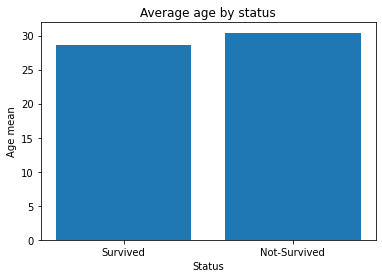

In [7]:
# your code here
import matplotlib.pyplot as plt
mask_survived = df['Survived'] == 1
mean_survived = df[mask_survived]['Age'].mean()
mean_not_survived = df[~mask_survived]['Age'].mean()

status = ['Survived', 'Not-Survived']
means = [mean_survived, mean_not_survived]

plt.bar(status, means)
plt.title('Average age by status')
plt.xlabel('Status')
plt.ylabel('Age mean')

plt.show()


-> your answer here: The graph shows that on average, those who survived were slightly younger than those who did not. The group of survivals has an average age of 28.5 years, while the group of non-survivers has an average age of 30.41 years. 

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

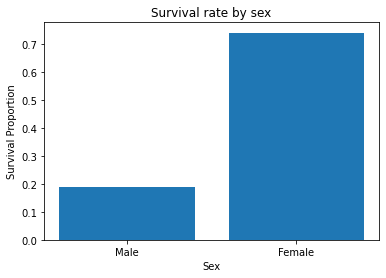

In [8]:
# your code here
mask_male = df['Sex'] == 0
total_male = len(df[mask_male])
male_proportion = df[mask_male]['Survived'].sum() / total_male

total_female = len(df[~mask_male])
female_proportion = df[~mask_male]['Survived'].sum() / total_female

sex = ['Male', 'Female']
survival_proportion = [male_proportion, female_proportion]

plt.bar(sex, survival_proportion)
plt.title('Survival rate by sex')
plt.xlabel('Sex')
plt.ylabel('Survival Proportion')

plt.show()


-> your answer here:
The graph shows a significantly higher proportion of survival for women than for men. This probably has to do with the fact that women were boarded into lifeboat before men did, and therefore tha majorority of women survived. 

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
[0.15667311411992263, 0.792, 0.6978021978021978, 0.575, 0.0, 0.0, 0.42857142857142855, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 0.0, 1.0, 0.0]


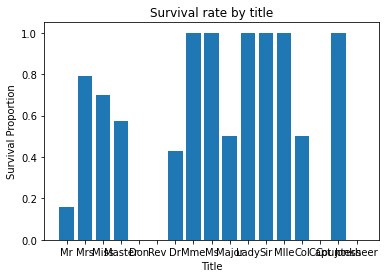

In [9]:
# your code here
print(df['Title'].unique())
titles = df['Title'].unique()

proportions = []

for title in titles: 
    mask = df['Title'] == title
    total_title = len(df[mask])
    title_proportion = df[mask]['Survived'].sum() / total_title
    proportions.append(title_proportion)

print(proportions)

plt.bar(titles, proportions)
plt.title('Survival rate by title')
plt.xlabel('Title')
plt.ylabel('Survival Proportion')

plt.show()
    

-> your answer here: Consistent with the previous question, titles associated with men, such as Mr and Don had very low survival proportions. On the other hand, titles associated with women had a very high proportion of survival

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

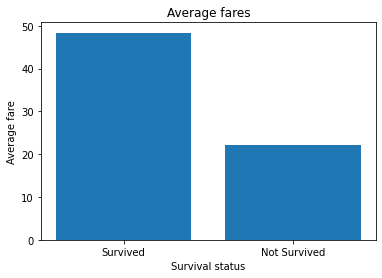

In [10]:
# your code here
mask_survived = df['Survived'] == 1

fare_survived = df[mask_survived]['Fare'].mean()
fare_survived

fare_notsurvived = df[~mask_survived]['Fare'].mean()
fare_notsurvived 

survival_status = ['Survived', 'Not Survived']
avg_fares = [fare_survived, fare_notsurvived]

plt.bar(survival_status, avg_fares)
plt.title('Average fares')
plt.xlabel('Survival status')
plt.ylabel('Average fare')

plt.show()



-> your answer here
Those who survived paid a significantly higher fare than those who did not. 

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

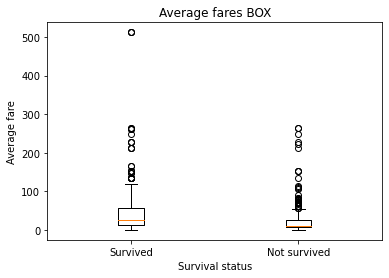

In [11]:
# your code here
plt.boxplot([df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], labels=['Survived', 'Not survived'])
plt.title('Average fares BOX')
plt.xlabel('Survival status')
plt.ylabel('Average fare')
plt.show()

-> your answer here

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [12]:
# your code here
def normalize(df):
    df['Normalized fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
    return df

df = normalize(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title,Normalized fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley Florence Briggs Thayer",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley Florence Briggs Thayer,Cumings,Mrs,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath Lily May Peel",1,35.0,1,0,113803,53.1000,S,Jacques,Heath Lily May Peel,Futrelle,Mrs,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr,-0.486064


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [13]:
df1 = df
df = df._get_numeric_data()
df.to_csv('num.csv')

m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [14]:
import pandas as pd 
import numpy as np
from numpy.linalg import norm

dist_matrix = []

for passenger_i in range(len(df['PassengerId'] + 1)):
    distances = []
    for passenger_j in range(len(df['PassengerId'] + 1)):
        distance = norm(df.iloc[passenger_i] - df.iloc[passenger_j])
        distances.append(distance)
    dist_matrix.append(distances)
        

dist_matrix = pd.DataFrame(dist_matrix)

dist_matrix



,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,66.067571,4.843120,47.823360,13.661635,9.313270,55.281834,25.400945,10.539740,25.865031,...,881.069474,882.007186,883.027501,884.005679,885.448875,886.033902,887.300835,888.184003,889.303532,890.056880
1,66.067571,0.000000,64.543782,18.540935,63.443435,63.564798,25.716147,62.168273,61.631872,48.375179,...,882.299044,883.242365,884.151630,885.433559,885.023187,886.988342,887.165712,888.333190,889.041619,891.292385
2,4.843120,64.543782,0.000000,46.136830,9.328217,4.996799,52.319076,28.035558,7.162217,26.184634,...,879.029010,880.013477,881.007737,882.002135,883.364943,884.016836,885.305316,886.147170,887.277579,888.021413
3,47.823360,18.540935,46.136830,0.000000,45.147806,45.086448,19.352830,46.281918,43.126756,31.757815,...,879.169635,880.130713,881.061005,882.263827,882.352556,883.948902,884.447187,885.517689,886.348028,888.168033
4,13.661635,63.443435,9.328217,45.147806,0.000000,5.409818,47.846760,35.745200,9.772952,30.904886,...,877.002294,878.100272,879.031857,880.057385,881.275970,882.050743,883.421189,884.153468,885.320844,886.005130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886.033902,886.988342,884.016836,883.948902,882.050743,881.016413,881.272322,879.398790,878.005971,877.264231,...,9.384211,7.012081,4.031443,6.664596,20.787518,0.000000,18.897540,11.293005,17.352724,8.341083
887,887.300835,887.165712,885.305316,884.447187,883.421189,882.331403,881.967212,880.218546,879.243480,878.015379,...,26.959108,20.463448,21.918120,24.039879,20.851042,18.897540,0.000000,12.976555,7.348469,26.062674
888,888.184003,888.333190,886.147170,885.517689,884.153468,883.130705,882.797899,881.441935,880.091500,879.168536,...,17.547847,16.358924,14.235779,17.696062,11.735633,11.293005,12.976555,0.000000,8.282714,16.182827
889,889.303532,889.041619,887.277579,886.348028,885.320844,884.273100,883.714978,882.380127,881.207749,880.083522,...,24.633179,21.230937,20.552469,23.620241,14.722973,17.352724,7.348469,8.282714,0.000000,23.178934


In [76]:
import pandas as pd 
import numpy as np
from numpy.linalg import norm

def similar(df, N):
    dist_matrix = []

    for passenger_i in range(len(df['PassengerId'] + 1)):
        distances = []
        for passenger_j in range(len(df['PassengerId'] + 1)):
            distance = norm(df.iloc[passenger_i] - df.iloc[passenger_j])
            distances.append(distance)
        dist_matrix.append(distances)
            

    dist_matrix = pd.DataFrame(dist_matrix)

    dist_matrix.replace(0, np.nan, inplace=True)

    min_pairs = []
    for column in dist_matrix.columns:
        j = dist_matrix[column].idxmin()
        i = column
        k = dist_matrix[column].min()
        min_pairs.append([(i, j), k])

    pairs_id = pd.DataFrame(min_pairs)
    pairs_id.columns = ['Pair', 'Distance']
    pairs_id.sort_values(by='Distance', inplace=True)

    top = pairs_id.head(N)['Pair']

    top_pairs = []
    for pair in range(N):
        top_pairs.append([top.iloc[pair][0], top.iloc[pair][1]])

    top_pairs_names = []
    for j,k in top_pairs:
        top_pairs_names.append((df1.iloc[j]['Name'], df1.iloc[k]['Name']))
        

    return top_pairs_names

# [('Nankoff, Mr. Minko', 'Ivanoff, Mr. Kanio'),
#('McGovern, Miss. Mary', 'Mockler, Miss. Helen Mary "Ellie"'),
# ('Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron')]

similar(df, 3)

[('Nankoff, Mr. Minko', 'Ivanoff, Mr. Kanio'),
 ('McGovern, Miss. Mary', 'Mockler, Miss. Helen Mary "Ellie"'),
 ('Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron')]

In [78]:
def N_most_similar(df, N):
    dist_matrix = []

    for passenger_i in range(len(df['PassengerId'] + 1)):
        distances = []
        for passenger_j in range(len(df['PassengerId'] + 1)):
            distance = norm(df.iloc[passenger_i] - df.iloc[passenger_j])
            distances.append(distance)
        dist_matrix.append(distances)
            

    dist_matrix = pd.DataFrame(dist_matrix)

    dist_matrix.replace(0, np.nan, inplace=True)

    min_pairs = []
    for column in dist_matrix.columns:
        j = dist_matrix[column].idxmin()
        i = column
        k = dist_matrix[column].min()
        min_pairs.append([(i, j), k])

    pairs_id = pd.DataFrame(min_pairs)
    pairs_id.columns = ['Pair', 'Distance']
    pairs_id.sort_values(by='Distance', inplace=True)

    top = pairs_id.head(N)['Pair']

    top_pairs = []
    for pair in range(N):
        top_pairs.append([top.iloc[pair][0], top.iloc[pair][1]])

    top_pairs_names = []
    for j,k in top_pairs:
        top_pairs_names.append((df1.iloc[j]['Name'], df1.iloc[k]['Name']))
        

    return top_pairs_names

print("The 3 most similar passengers are: ", N_most_similar(df, 3))


The 3 most similar passengers are:  [('Nankoff, Mr. Minko', 'Ivanoff, Mr. Kanio'), ('McGovern, Miss. Mary', 'Mockler, Miss. Helen Mary "Ellie"'), ('Berriman, Mr. William John', 'Troupiansky, Mr. Moses Aaron')]


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [ ]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get('Python')
data_science = get('Data Science')
data_analytics = get('Data Analysis')
machine_learning = get('Machine Learning')
deep_learning = get('Deep learning')



b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [ ]:
# your code here
df_python = pd.DataFrame(python)
df_python = pd.json_normalize(python['items'])
df_python.to_csv('df_python.csv')

df_data_science = pd.DataFrame(data_science)
df_data_science = pd.json_normalize(data_science['items'])
df_data_science.to_csv('df_data_science.csv')

df_data_analytics = pd.DataFrame(data_analytics)
df_data_analytics = pd.json_normalize(data_analytics['items'])
df_data_analytics.to_csv('df_data_analytics.csv')

df_machine_learning = pd.DataFrame(machine_learning)
df_machine_learning = pd.json_normalize(machine_learning['items'])
df_machine_learning.to_csv('df_machine_learning.csv')

df_deep_learning = pd.DataFrame(deep_learning)
df_deep_learning = pd.json_normalize(deep_learning['items'])
df_deep_learning.to_csv('df_deep_learning.csv')



c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [ ]:
# your code here
topics_data = [df_python, df_data_science, df_data_analytics, df_machine_learning, df_deep_learning]
for frame in topics_data:
    frame = frame.rename(columns = {'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Author'}, inplace = True)

df_python.head()

,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Author,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,searchInfo.textSnippet,volumeInfo.publisher,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink
0,books#volume,zjqzDAEACAAJ,WXmQ0T5d28M,https://www.googleapis.com/books/v1/volumes/zj...,Python for Everybody,Exploring Data in Python 3,[Charles R. Severance],2016-04-09,Python for Everybody is designed to introduce ...,"[{'type': 'ISBN_10', 'identifier': '1530051126...",...,&quot;Designed to teach people to program even...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,books#volume,aTkzEAAAQBAJ,E0yz9A1Y0s4,https://www.googleapis.com/books/v1/volumes/aT...,The Quick Python Book,NaN,[Naomi Ceder],2018-05-03,Summary This third revision of Manning's popul...,"[{'type': 'ISBN_13', 'identifier': '9781638353...",...,Python programmers are in high demand/mdash;yo...,Simon and Schuster,[Computers],30.99,USD,30.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/The_Qui...
2,books#volume,Chr1NDlUcI8C,zV4RMC9kZWA,https://www.googleapis.com/books/v1/volumes/Ch...,Python Essential Reference,NaN,[David M. Beazley],2009,Presents a guide to the features and library m...,"[{'type': 'ISBN_13', 'identifier': '9780672329...",...,Presents a guide to the features and library m...,Addison-Wesley Professional,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,books#volume,bTUFCAAAQBAJ,6dHfABqDEZY,https://www.googleapis.com/books/v1/volumes/bT...,Effective Python,59 Specific Ways to Write Better Python,[Brett Slatkin],2015,"""It's easy to start writing code with Python: ...","[{'type': 'ISBN_13', 'identifier': '9780134034...",...,Effective Python will help students harness th...,Pearson Education,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,books#volume,4pgQfXQvekcC,hFL+zOchMTU,https://www.googleapis.com/books/v1/volumes/4p...,Learning Python,Powerful Object-Oriented Programming,[Mark Lutz],2013-06-12,"Get a comprehensive, in-depth introduction to ...","[{'type': 'ISBN_13', 'identifier': '9781449355...",...,"Get a comprehensive, in-depth introduction to ...","""O'Reilly Media, Inc.""",NaN,63.99,USD,63.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN


d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [91]:
# your code here
topics = ['python', 'data_science', 'data_analytics', 'machine_learning', 'deep_learning']

df_python['Topic'] = 'Python'
df_data_science['Topic'] = 'Data Science'
df_data_analytics['Topic'] = 'Data Analytics'
df_machine_learning['Topic'] = 'Machine Learning'
df_deep_learning['Topic'] = 'Deep Learning'

merged = pd.concat(topics_data, ignore_index=True)

merged.to_csv('merged.csv')



e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [111]:
# your code here
def sort_data(merged):
    return merged[merged.apply(lambda r: r.str.contains('b', case=False).any(), axis=1)]

sort_data(merged).head()


,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Author,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
0,books#volume,zjqzDAEACAAJ,WXmQ0T5d28M,https://www.googleapis.com/books/v1/volumes/zj...,Python for Everybody,Exploring Data in Python 3,[Charles R. Severance],2016-04-09,Python for Everybody is designed to introduce ...,"[{'type': 'ISBN_10', 'identifier': '1530051126...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,python,NaN
1,books#volume,aTkzEAAAQBAJ,E0yz9A1Y0s4,https://www.googleapis.com/books/v1/volumes/aT...,The Quick Python Book,NaN,[Naomi Ceder],2018-05-03,Summary This third revision of Manning's popul...,"[{'type': 'ISBN_13', 'identifier': '9781638353...",...,[Computers],30.99,USD,30.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/The_Qui...,python,NaN
2,books#volume,Chr1NDlUcI8C,zV4RMC9kZWA,https://www.googleapis.com/books/v1/volumes/Ch...,Python Essential Reference,NaN,[David M. Beazley],2009,Presents a guide to the features and library m...,"[{'type': 'ISBN_13', 'identifier': '9780672329...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,python,NaN
3,books#volume,bTUFCAAAQBAJ,6dHfABqDEZY,https://www.googleapis.com/books/v1/volumes/bT...,Effective Python,59 Specific Ways to Write Better Python,[Brett Slatkin],2015,"""It's easy to start writing code with Python: ...","[{'type': 'ISBN_13', 'identifier': '9780134034...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,python,NaN
4,books#volume,4pgQfXQvekcC,hFL+zOchMTU,https://www.googleapis.com/books/v1/volumes/4p...,Learning Python,Powerful Object-Oriented Programming,[Mark Lutz],2013-06-12,"Get a comprehensive, in-depth introduction to ...","[{'type': 'ISBN_13', 'identifier': '9781449355...",...,NaN,63.99,USD,63.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,python,NaN


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [131]:
# your code here
def author_E(merged):
    merged['Author E'] = merged['Author'].apply(lambda x: 'True' if x[0][0]=='E' else 'False')
    return merged[merged['Author E'] == 'True']

author_E(merged)

,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Author,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink,Author E
19,books#volume,xDszEAAAQBAJ,JxnLoM51bRA,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,NaN,"[Emily Robinson, Jacqueline Nolis]",2020-03-06,Summary You are going to need more than techni...,"[{'type': 'ISBN_13', 'identifier': '9781638350...",...,28.99,USD,28.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Build_a...,data_science,NaN,True
33,books#volume,NP5bBAAAQBAJ,RCVFyQztFp8,https://www.googleapis.com/books/v1/volumes/NP...,Introduction to Machine Learning,NaN,[Ethem Alpaydin],2014-08-29,The goal of machine learning is to program com...,"[{'type': 'ISBN_13', 'identifier': '9780262028...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,machine_learning,NaN,True
34,books#volume,AGQ4DQAAQBAJ,HNSf1bNJSlk,https://www.googleapis.com/books/v1/volumes/AG...,Machine Learning,The New AI,[Ethem Alpaydin],2016-10-07,A concise overview of machine learning—compute...,"[{'type': 'ISBN_13', 'identifier': '9780262529...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,machine_learning,NaN,True
45,books#volume,LrT4DwAAQBAJ,VowaSx/5D0Y,https://www.googleapis.com/books/v1/volumes/Lr...,Introduction to Deep Learning,NaN,[Eugene Charniak],2019-01-29,A project-based guide to the basics of deep le...,"[{'type': 'ISBN_13', 'identifier': '9780262039...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deep_learning,NaN,True
